# Final Project
Albert Xu & Regina Zbarskaya

In [19]:
# import appropriate packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition.pca import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import svm

In [20]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
# import data into dataframes 
df1 = pd.read_csv('winequality-red.csv', delimiter=';')
df2 = pd.read_csv('winequality-white.csv', delimiter=';')

# place values into arrays 
red = df1.values
white = df2.values

In [21]:
# Create column of ones for red and column of zeros for white 
red = np.hstack((df1.values, np.ones((red.shape[0], 1))))
white = np.hstack((df2.values, np.zeros((white.shape[0], 1))))

# Combine both red and white arrays into one final array 
X = np.vstack((red, white))

# Separate y from x by using last column of 1s/0s to indicate red/white 
X, y = X[:,:-1], X[:,-1]

# Split data randomly into (approximately) equal arrays of training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
len(y_train)

3248

# Logistic Regression

In [22]:
# Apply logistic regression on data to predict red/white wine 
def logreg_model(pen, X_train, X_test, y_train, y_test, suppress):
    logreg = LogisticRegression(penalty=pen)
    logreg.fit(X_train, y_train)
    yhat = logreg.predict(X_test)
    
    tr_acc = logreg.score(X_train, y_train)*100
    ts_acc = logreg.score(X_test, y_test)*100
    if(not suppress):
        print('\tTraining Accuracy: {0:.2f}%'.format(tr_acc))
        print('\tTest Accuracy: {0:.2f}%'.format(ts_acc))
    return tr_acc, ts_acc
    
# ---------- Lasso (L1) Regularization ----------
print('\nLasso (L1) Regularization: ')
logreg_model('l1', X_train, X_test, y_train, y_test, 0)

# ---------- Ridge (L2) Regularization ----------
print('\nRidge (L2) Regularization: ')
logreg_model('l2', X_train, X_test, y_train, y_test, 0)


Lasso (L1) Regularization: 
	Training Accuracy: 98.49%
	Test Accuracy: 98.77%

Ridge (L2) Regularization: 
	Training Accuracy: 97.91%
	Test Accuracy: 98.43%


(97.9064039408867, 98.4302862419206)

In [23]:
# ---------- Polynomial Feature Transformation (2, 3) ----------
def poly_t(feat, model):
    poly = PolynomialFeatures(feat)
    
    # Create the transformed data matrices for training and test using poly.fit_transform(..)
    X_transformed_train = poly.fit_transform(X_train)
    X_transformed_test = poly.fit_transform(X_test)
    
    logreg_model(model, X_transformed_train, X_transformed_test, y_train, y_test, 0)
    
# Perform logistic regression with both regularizations
for i in range(2,4):
    print('\n({0}) Poly Feature Transformation, Lasso (L1) Regularization: '.format(i))
    poly_t(i, 'l1')
    print('\n({0}) Poly Feature Transformation, Ridge (L2) Regularization: '.format(i))
    poly_t(i, 'l2')


(2) Poly Feature Transformation, Lasso (L1) Regularization: 
	Training Accuracy: 99.17%
	Test Accuracy: 98.43%

(2) Poly Feature Transformation, Ridge (L2) Regularization: 
	Training Accuracy: 98.68%
	Test Accuracy: 98.21%

(3) Poly Feature Transformation, Lasso (L1) Regularization: 
	Training Accuracy: 99.69%
	Test Accuracy: 98.95%

(3) Poly Feature Transformation, Ridge (L2) Regularization: 
	Training Accuracy: 97.48%
	Test Accuracy: 97.54%


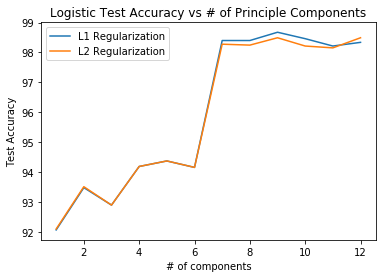

In [24]:
# ---------- Changing Number of Principle Components (Logistic) ----------
def pca_transform(X, n_components):
    pca = PCA(n_components)
    pca.fit(X)
    return pca.transform(X)

# create arrays to hold test accuracy 
test_acc_1 = []
test_acc_2 = []
for i in range(1, 13):
    # split original x array based on n components 
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(pca_transform(X, i), y, test_size=0.5)
    # fit using l1 regularization 
    acc = logreg_model('l1', X2_train, X2_test, Y2_train, Y2_test, 1)
    test_acc_1.append(acc[1])
    # fit using l2 regularization 
    acc = logreg_model('l2', X2_train, X2_test, Y2_train, Y2_test, 1)
    test_acc_2.append(acc[1])

# plot both regularizations on one graph 
l1, = plt.plot(range(1, 13), test_acc_1, label='L1 Regularization')
plt.title('Logistic Test Accuracy vs # of Principle Components')
plt.xlabel('# of components')
plt.ylabel('Test Accuracy')

l2, = plt.plot(range(1,13), test_acc_2, label='L2 Regularization')
plt.legend(handles=[l1, l2])

# Support Vector Machines (SVM)

#### LinearSVM

In [25]:
# Apply linear SVM to on data to predict red/white wine 
def svm_linear(pen, X_train, X_test, y_train, y_test, suppress):
    model = LinearSVC(penalty=pen,loss='squared_hinge',dual=False)
    model.fit(X_train, y_train)
    
    tr_acc = model.score(X_train, y_train)*100
    ts_acc = model.score(X_test, y_test)*100
    if(not suppress):
        print('\tTraining Accuracy: {0:.2f}%'.format(tr_acc))
        print('\tTest Accuracy: {0:.2f}%'.format(ts_acc))
    return tr_acc, ts_acc
    
# ---------- Lasso (L1) Regularization ----------
print('\nLasso (L1) Regularization: ')
svm_linear('l1', X_train, X_test, y_train, y_test, 0)

# ---------- Ridge (L2) Regularization ----------
print('\nRidge (L2) Regularization: ')
svm_linear('l2', X_train, X_test, y_train, y_test, 0)


Lasso (L1) Regularization: 
	Training Accuracy: 98.74%
	Test Accuracy: 98.74%

Ridge (L2) Regularization: 
	Training Accuracy: 98.74%
	Test Accuracy: 98.95%


(98.73768472906403, 98.9535241612804)

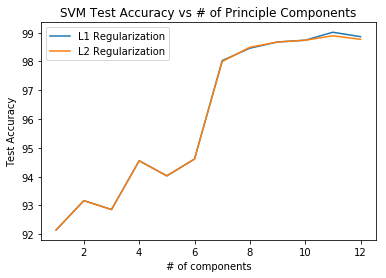

In [26]:
# ---------- Changing Number of Principle Components for LinearSVC ----------
# create arrays to hold test accuracy 
test_acc_1 = []
test_acc_2 = []
for i in range(1, 13):
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(pca_transform(X, i), y, test_size=0.5)
    # fit using l1 regularization 
    acc = svm_linear('l1', X2_train, X2_test, Y2_train, Y2_test, 1)
    test_acc_1.append(acc[1])
    # fit using l2 regularization 
    acc = svm_linear('l2', X2_train, X2_test, Y2_train, Y2_test, 1)
    test_acc_2.append(acc[1])

# plot both regularizations on one graph 
l1, = plt.plot(range(1, 13), test_acc_1, label='L1 Regularization')
plt.title('SVM Test Accuracy vs # of Principle Components')
plt.xlabel('# of components')
plt.ylabel('Test Accuracy')

l2, = plt.plot(range(1,13), test_acc_2, label='L2 Regularization')
plt.legend(handles=[l1, l2])

#### SVM

In [27]:
# Apply different SVM kernels to predict red/white wine 
# ---------- Linear Kernel (different library from linear SVC above) ----------
def svm_lin(X_train, X_test, y_train, y_test, suppress):
    svc_lin = svm.SVC(probability=False,kernel='linear')
    svc_lin.fit(X_train, y_train)

    # Calculate accuracy 
    tr_acc = svc_lin.score(X_train, y_train)*100
    ts_acc = svc_lin.score(X_test, y_test)*100
    
    if(not suppress):
        print('\nSVM, Linear Kernel: ')
        print('\tTraining Accuracy: {0:.2f}%'.format(tr_acc))
        print('\tTest Accuracy: {0:.2f}%'.format(ts_acc))
        
    return tr_acc, ts_acc


# ---------- RBF Kernel ----------
def svm_rbf(X_train, X_test, y_train, y_test, suppress):
    svc_rbf = svm.SVC(probability=False, kernel='rbf')
    svc_rbf.fit(X_train, y_train)

    # Calculate accuracy 
    tr_acc = svc_rbf.score(X_train, y_train)*100
    ts_acc = svc_rbf.score(X_test, y_test)*100
    
    if(not suppress):
        print('\nSVM, RBF Kernel: ')
        print('\tTraining Accuracy: {0:.2f}%'.format(tr_acc))
        print('\tTest Accuracy: {0:.2f}%'.format(ts_acc))

    return tr_acc, ts_acc

# ---------- Polynomial Kernel ----------
def svm_poly(X_train, X_test, y_train, y_test, suppress):
    svc_polynomial = svm.SVC(probability=False,kernel='poly')
    #print(X_train.shape[0])
    '''
    # Changing number of samples to shorten computation time 
    num = 30
    A = X_train[0:num,:] 
    B = y_train[0:num]  
    C = X_test[0:num,:]  
    D = y_test[0:num]
    svc_polynomial.fit(A,B)
    '''
    svc_polynomial.fit(X_train, y_train)

    # Calcualte accuracy 
    #tr_acc = svc_polynomial.score(A, B)*100
    #ts_acc = svc_polynomial.score(C, D)*100
    tr_acc = svc_polynomial.score(X_train, y_train)*100
    ts_acc = svc_polynomial.score(X_test, y_test)*100

    if(not suppress):
        print('\nSVM, Polynomial Kernel: ')
        print('\tTraining Accuracy: {0:.2f}%'.format(tr_acc))
        print('\tTest Accuracy: {0:.2f}%'.format(ts_acc))
    
    return tr_acc, ts_acc

Run 1
	 Linear Kernel
	 RBF Kernel
Run 2
	 Linear Kernel
	 RBF Kernel
Run 3
	 Linear Kernel
	 RBF Kernel
Run 4
	 Linear Kernel
	 RBF Kernel
Run 5
	 Linear Kernel
	 RBF Kernel
Run 6
	 Linear Kernel
	 RBF Kernel
Run 7
	 Linear Kernel
	 RBF Kernel
Run 8
	 Linear Kernel
	 RBF Kernel
Run 9
	 Linear Kernel
	 RBF Kernel
Run 10
	 Linear Kernel
	 RBF Kernel
Run 11
	 Linear Kernel
	 RBF Kernel
Run 12
	 Linear Kernel
	 RBF Kernel
Run 1
	 Polynomial Kernel 
25
Run 2
	 Polynomial Kernel 
25
Run 3
	 Polynomial Kernel 
25
Run 4
	 Polynomial Kernel 
25
Run 5
	 Polynomial Kernel 
25
Run 6
	 Polynomial Kernel 
25
Run 7
	 Polynomial Kernel 
25
Run 8
	 Polynomial Kernel 
25
Run 9
	 Polynomial Kernel 
25
Run 10
	 Polynomial Kernel 
25
Run 11
	 Polynomial Kernel 
25
Run 12
	 Polynomial Kernel 
25


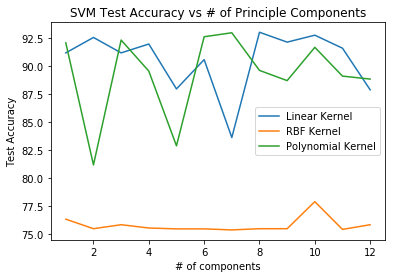

In [29]:
# ---------- Changing Number of Principle Components for SVM ----------
# create arrays to hold test accuracy 
test_acc_1 = []
test_acc_2 = []
test_acc_3 = [] 
for i in range(1, 13):
    print('Run {0}'.format(i))
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(pca_transform(X, i), y, test_size=0.996)
    print('\t Linear Kernel')
    # fit using linear kernel
    acc = svm_lin(X2_train, X2_test, Y2_train, Y2_test, 1)
    test_acc_1.append(acc[1])
    print('\t RBF Kernel')
    # fit using rbf kernel
    acc = svm_rbf(X2_train, X2_test, Y2_train, Y2_test, 1)
    test_acc_2.append(acc[1])
    
for i in range(1, 13):
    print('Run {0}'.format(i))
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(pca_transform(X, i), y, test_size=0.996)
    print('\t Polynomial Kernel ')
    # fit using polynomial kernel 
    acc = svm_poly(X2_train, X2_test, Y2_train, Y2_test, 1)
    test_acc_3.append(acc[1])

# plot all three kernels on one graph 
l1, = plt.plot(range(1, 13), test_acc_1, label='Linear Kernel')
plt.title('SVM Test Accuracy vs # of Principle Components')
plt.xlabel('# of components')
plt.ylabel('Test Accuracy')

l2, = plt.plot(range(1,13), test_acc_2, label='RBF Kernel')
l3, = plt.plot(range(1,13), test_acc_3, label='Polynomial Kernel')
plt.legend(handles=[l1, l2, l3])

# Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

class AccHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.acc = []
 
    def on_batch_end(self, batch, logs={}):
        self.loss.append(logs.get('loss'))
        
    def on_epoch_end(self, epoch, logs):
        self.acc.append(logs.get('acc'))


keras.backend.clear_session()
cb = AccHistory()
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_dim=12))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[cb])

In [ ]:
print("Test Loss: \t{}\nTest Accuracy: \t{}".format(*model.test_on_batch(X_test, y_test)))
plt.plot(cb.acc)
plt.title('Accuracy')
plt.xlabel('epoch')
plt.figure()
plt.plot(cb.loss)
plt.title('Loss')
plt.xlabel('batch')